In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd # cleaning the data
import numpy as np  # for large calculations
import matplotlib.pyplot as plt # matlab
import seaborn as sns
import missingno as msno

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # 0.1
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn import datasets, linear_model

# machine learning
# sklearn
# tensorflow


path = '/content/drive/MyDrive/data.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
# copy the data
df = df.copy()

  
# apply normalization techniques
for column in df.columns[1:-1]:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    
  
# view normalized data
print(df)

       Unnamed: 0        X1        X2        X3        X4        X5        X6  \
0      X21.V1.791  0.553717  0.571107  0.584371  0.598207  0.599275  0.526728   
1      X15.V1.924  0.624123  0.625176  0.620328  0.629447  0.637957  0.579905   
2         X8.V1.1  0.506872  0.506618  0.506229  0.522997  0.531581  0.481668   
3       X16.V1.60  0.486396  0.489158  0.492356  0.507087  0.514355  0.465155   
4       X20.V1.54  0.513324  0.499296  0.491789  0.504194  0.517679  0.478310   
...           ...       ...       ...       ...       ...       ...       ...   
11495  X22.V1.114  0.509677  0.511405  0.513024  0.526179  0.530372  0.479989   
11496  X19.V1.354  0.502665  0.514503  0.527463  0.555973  0.583862  0.550798   
11497    X8.V1.28  0.519776  0.519290  0.515855  0.529071  0.544273  0.499020   
11498  X10.V1.932  0.504628  0.510560  0.516988  0.530229  0.540647  0.495102   
11499  X16.V1.210  0.523983  0.529147  0.535674  0.554527  0.563614  0.509096   

             X7        X8  

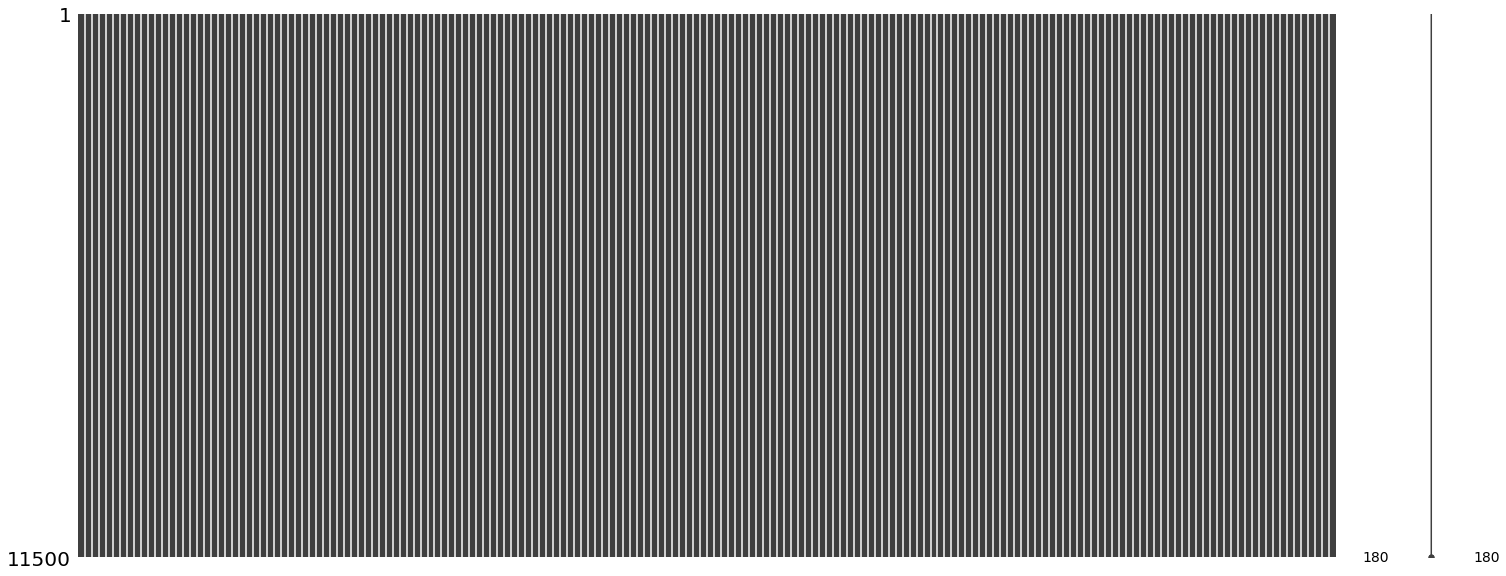

In [ ]:
msno.matrix(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed: 0 to y
dtypes: float64(178), int64(1), object(1)
memory usage: 15.8+ MB


In [ ]:
negative_results = len(df[df['y']==0])
positive_results = len(df[df['y']==1])
per_of_negative = negative_results/(negative_results + positive_results)
print("percentage of negative results is", per_of_negative*100)
per_of_positive = positive_results/(negative_results + positive_results)
print("percentage of positive results is", per_of_positive*100)

percentage of negative results is 0.0
percentage of positive results is 100.0


In [ ]:
df["y"].replace({2: 0, 3: 0, 4: 0, 5: 0}, inplace=True)

In [ ]:
df["y"].value_counts()

0    9200
1    2300
Name: y, dtype: int64

In [ ]:
df.pop("Unnamed: 0")

0        X21.V1.791
1        X15.V1.924
2           X8.V1.1
3         X16.V1.60
4         X20.V1.54
            ...    
11495    X22.V1.114
11496    X19.V1.354
11497      X8.V1.28
11498    X10.V1.932
11499    X16.V1.210
Name: Unnamed: 0, Length: 11500, dtype: object

In [ ]:
X = df.drop(columns=['y'])
y = df['y']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb_pred = nb.predict(X_test)
accuracy_score(y_test,nb_pred)




0.9602898550724638

In [ ]:
print(confusion_matrix(y_test, nb_pred))

[[2700   59]
 [  78  613]]


In [ ]:
# from sklearn.neural_network import MLPClassifier
# mlp=MLPClassifier(hidden_layer_sizes=(5,2),activation='relu')
# mlp
# mlp.fit(X_train,y_train)
# pred=mlp.predict(X_test)
# accuracy_score(y_test,pred)

# Classical Naive Bayes supports categorical features and models each as conforming to a Multinomial Distribution. 
# Gaussian Naive Bayes supports continuous valued features and models each as conforming to a Gaussian (normal) distribution. 
# The bottom line is that when your data set’s features are all categorical, the classical Naive Bayes classifier is appropriate. 
# When you data set’s features are all continuous, the Gaussian Naive Bayes classifier is appropriate